<a href="https://colab.research.google.com/github/RupeshSharma14/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : </b>
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? 

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


%matplotlib inline

In [2]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [3]:
# Mounting the goole drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset

airbnb_df = pd.read_csv("/content/drive/MyDrive/Airbnb Bookings Analysis/Airbnb NYC 2019.csv")

In [5]:
# Displaying first five rows of the dataset

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Displaying last five rows of the dataset

airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# Checking the size of the dataset

airbnb_df.shape

(48895, 16)

In [8]:
#  Displaying more information about the airbnb dataframe --> Column name, Null values and Dtypes

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [10]:
# Dropping the rows having Nan values in "name" and "host_name" column

airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)

In [11]:
# Extracting the index of null values rows in "reviews_per_month", "last_review" columns

null_value_index = np.where(airbnb_df[["reviews_per_month", "last_review"]].isnull())[0]
len(null_value_index)

20074

In [12]:
# Dataframe having null values in "reviews_per_month", "last_review" columns

null_value_df = airbnb_df.iloc[null_value_index]
null_value_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [13]:
# Filling Nan values in "reviews_per_month" with 0.0

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)

In [14]:
# Converting the data type of "last_review" column to datetime object

airbnb_df["last_review"] = airbnb_df["last_review"].astype("datetime64")

In [15]:
# Extracting year and month from the "last_review" column

airbnb_df["last_review_month"] = airbnb_df["last_review"].apply(lambda row: row.month)
airbnb_df["last_review_year"] = airbnb_df["last_review"].apply(lambda row: row.year)

In [16]:
# Checking the dtypes of "last_review_month" and "last_review_year" columns

month_year_cols = ["last_review_month", "last_review_year"]
airbnb_df[month_year_cols].dtypes

last_review_month    float64
last_review_year     float64
dtype: object

In [17]:
# Converting the dtypes of "last_review_month" and "last_review_year" into integer

airbnb_df[month_year_cols] = airbnb_df[month_year_cols].astype("Int64")                       # Int64 represents nullable int

In [18]:
# Dropping "last_review" column

airbnb_df.drop(labels = "last_review", axis = 1, inplace = True)

In [19]:
# Renaming the column "neighbourhood_groups" and "id" as "boroughs" and "listings_id" respectively

airbnb_df.rename(columns = {"id": "listings_id", "neighbourhood_group": "boroughs"}, inplace = True)

In [20]:
airbnb_df.head()

,listings_id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,<NA>,<NA>
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,7,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,11,2018


In [21]:
# Displaying the basics statistics of the data

airbnb_df.describe()

,listings_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,38821.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425,6.173901,2018.288323
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962,2.531374,1.180598
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,5.000000,2018.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,6.000000,2019.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,7.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,12.000000,2019.000000


In [22]:
# Removing the rows where price is zero

airbnb_df = airbnb_df[airbnb_df["price"] != 0]

In [23]:
airbnb_df.head()

,listings_id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,<NA>,<NA>
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,7,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,11,2018


In [24]:
# Number of listings present in each borough

num_listings_boroughs = airbnb_df["boroughs"].value_counts().to_frame()
num_listings_boroughs.rename(columns = {"boroughs": "num_of_listings"}, inplace = True)
num_listings_boroughs.index.name = "Boroughs"
num_listings_boroughs

,num_of_listings
Boroughs,
Manhattan,21642
Brooklyn,20080
Queens,5664
Bronx,1088
Staten Island,373


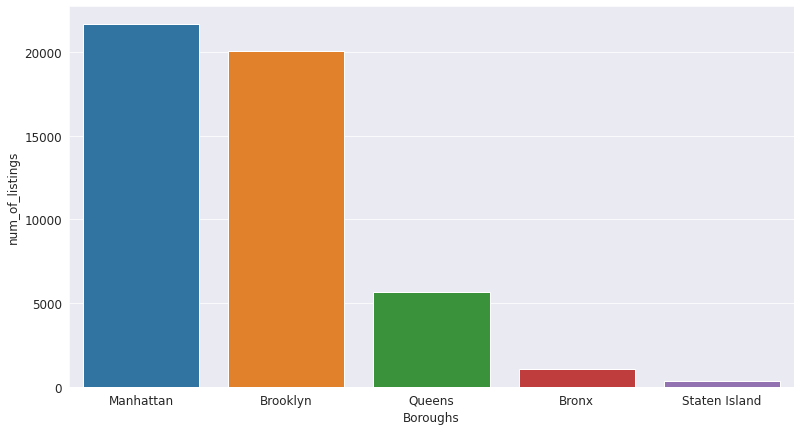

In [26]:
sns.barplot(x = num_listings_boroughs.index, y = "num_of_listings", data = num_listings_boroughs);

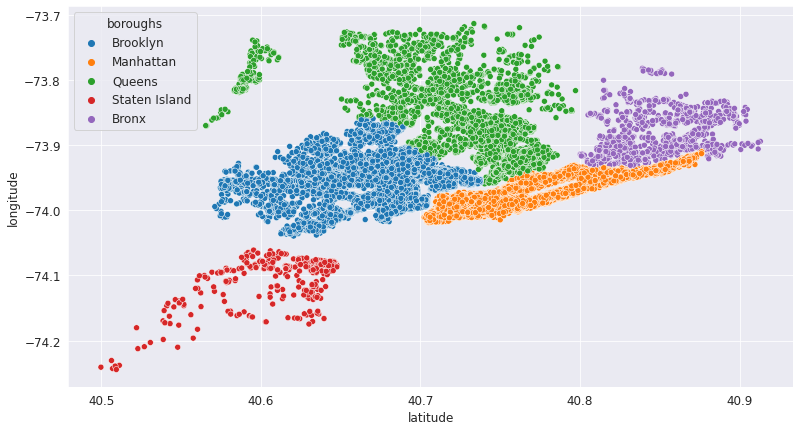

In [27]:
# Visualisation of NYC wrt boroughs

sns.scatterplot(x = "latitude", y = "longitude", hue = "boroughs", data = airbnb_df);

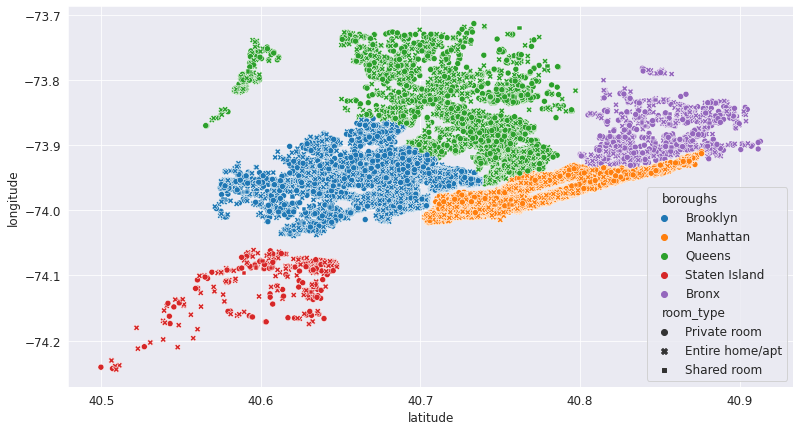

In [28]:
# Visualisation of NYC wrt boroughs and room_type

sns.scatterplot(x = "latitude", y = "longitude", hue = "boroughs", style = "room_type", data = airbnb_df);

In [31]:
# Create subset of airbnb_df wrt manhattan borough

manhattan_borough_df = airbnb_df[airbnb_df["boroughs"] == "Manhattan"]
manhattan_borough_df.head()

,listings_id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,<NA>,<NA>
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,11,2018
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,6,2019
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,6,2019


In [32]:
# Neighbourhood present in the borough Manhattan

manhattan_borough_df["neighbourhood"].unique()

array(['Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'West Village',
       'Chelsea', 'Inwood', 'East Village', 'Lower East Side', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Washington Heights',
       'Financial District', 'Morningside Heights', 'NoHo',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'Two Bridges', 'Nolita', 'Gramercy',
       'Theater District', 'Tribeca', 'Battery Park City', 'Civic Center',
       'Stuyvesant Town', 'Marble Hill'], dtype=object)

In [33]:
# Create subset of airbnb_df wrt  Brooklyn borough

brooklyn_borough_df = airbnb_df[airbnb_df["boroughs"] == "Brooklyn"]
brooklyn_borough_df.head()

,listings_id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,10,2018
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,7,2019
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,10,2017
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,1.34,3,314,6,2019
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,1.20,1,46,6,2019


In [34]:
# Neighbourhood present in Brooklyn

brooklyn_borough_df["neighbourhood"].unique()

array(['Kensington', 'Clinton Hill', 'Bedford-Stuyvesant', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Crown Heights', 'Park Slope',
       'Windsor Terrace', 'Greenpoint', 'Bushwick', 'Flatbush',
       'Prospect-Lefferts Gardens', 'Prospect Heights',
       'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands',
       'Cobble Hill', 'Boerum Hill', 'DUMBO', 'East Flatbush',
       'Gravesend', 'East New York', 'Sheepshead Bay', 'Fort Hamilton',
       'Bensonhurst', 'Sunset Park', 'Brighton Beach', 'Cypress Hills',
       'Bay Ridge', 'Columbia St', 'Vinegar Hill', 'Canarsie',
       'Borough Park', 'Downtown Brooklyn', 'Midwood', 'Red Hook',
       'Dyker Heights', 'Sea Gate', 'Navy Yard', 'Brownsville',
       'Manhattan Beach', 'Bergen Beach', 'Coney Island', 'Bath Beach',
       'Mill Basin'], dtype=object)

In [35]:
# Create subset of airbnb_df wrt Queens Borough

queens_borough_df = airbnb_df[airbnb_df["boroughs"] == "Queens"]
queens_borough_df.head()

,listings_id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,248,2.25,1,215,7,2019
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,0.22,1,324,5,2019
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,0.01,1,1,9,2011
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,28,0.26,1,126,4,2019
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,0.11,5,365,5,2019


In [36]:
# Neighbourhood present in Queens

queens_borough_df["neighbourhood"].unique()

array(['Long Island City', 'Woodside', 'Flushing', 'Sunnyside',
       'Ridgewood', 'Jamaica', 'Middle Village', 'Ditmars Steinway',
       'Astoria', 'Rockaway Beach', 'Forest Hills', 'Elmhurst',
       'Jackson Heights', 'St. Albans', 'Rego Park', 'Briarwood',
       'Ozone Park', 'East Elmhurst', 'Arverne', 'Cambria Heights',
       'Bayside', 'Kew Gardens', 'College Point', 'Glendale',
       'Richmond Hill', 'Queens Village', 'Bellerose', 'Maspeth',
       'Woodhaven', 'Kew Gardens Hills', 'Bay Terrace', 'Whitestone',
       'Bayswater', 'Fresh Meadows', 'Springfield Gardens',
       'Howard Beach', 'Belle Harbor', 'Jamaica Estates', 'Far Rockaway',
       'South Ozone Park', 'Corona', 'Neponsit', 'Laurelton',
       'Holliswood', 'Rosedale', 'Edgemere', 'Jamaica Hills', 'Hollis',
       'Douglaston', 'Little Neck', 'Breezy Point'], dtype=object)

In [37]:
# Create subset of airbnb_df wrt Bronx Borough

bronx_borough_df = airbnb_df[airbnb_df["boroughs"] == "Bronx"]
bronx_borough_df.head()

,listings_id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353,7,2019
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323,6,2019
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,0.00,7,349,<NA>,<NA>
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,0.50,13,365,6,2019
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,0.35,2,346,1,2019


In [38]:
# Neighbourhood present in Bronx Borough

bronx_borough_df["neighbourhood"].unique()

array(['Highbridge', 'Clason Point', 'Eastchester', 'Kingsbridge',
       'Woodlawn', 'University Heights', 'Allerton', 'Concourse Village',
       'Concourse', 'Wakefield', 'Spuyten Duyvil', 'Mott Haven',
       'Longwood', 'Morris Heights', 'Port Morris', 'Fieldston',
       'Mount Eden', 'City Island', 'Williamsbridge', 'Soundview',
       'Co-op City', 'Parkchester', 'North Riverdale', 'Bronxdale',
       'Riverdale', 'Norwood', 'Claremont Village', 'Fordham',
       'Mount Hope', 'Van Nest', 'Morris Park', 'Tremont',
       'East Morrisania', 'Hunts Point', 'Pelham Bay', 'Throgs Neck',
       'West Farms', 'Morrisania', 'Pelham Gardens', 'Belmont',
       'Baychester', 'Melrose', 'Schuylerville', 'Castle Hill',
       'Olinville', 'Edenwald', 'Westchester Square', 'Unionport'],
      dtype=object)

In [39]:
# Create a subset of airbnb_df wrt Staten Island borough

staten_island_borough_df = airbnb_df[airbnb_df["boroughs"] == "Staten Island"]
staten_island_borough_df.head()

,listings_id,name,host_id,host_name,boroughs,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
169,42882,New York room with a view,185978,Newyorkroomwithaview,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,1.66,1,312,6,2019
249,62452,A SpeciaL!! Private Room in NY,303939,Lissette,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,1.85,6,360,6,2019
250,62461,B NYC Staten Alternative...,303939,Lissette,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,147,1.44,6,0,6,2019
251,62787,C Private Room By The Ferry,303939,Lissette,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,177,1.71,6,320,7,2019
256,63320,D Private Che@p Room 2 Explore NYC,303939,Lissette,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,333,3.19,6,340,7,2019


In [40]:
# Neighbourhood present in Staten Island borough

staten_island_borough_df["neighbourhood"].unique()

array(['St. George', 'Tompkinsville', 'Emerson Hill', 'Shore Acres',
       'Arrochar', 'Clifton', 'Graniteville', 'Stapleton',
       'New Springville', 'Tottenville', 'Mariners Harbor', 'Concord',
       'Port Richmond', 'Woodrow', 'Eltingville', 'Lighthouse Hill',
       'West Brighton', 'Great Kills', 'Dongan Hills',
       'Castleton Corners', 'Randall Manor', 'Todt Hill', 'Silver Lake',
       'Grymes Hill', 'New Brighton', 'Midland Beach', 'Richmondtown',
       'Howland Hook', 'New Dorp Beach', "Prince's Bay", 'South Beach',
       'Oakwood', 'Huguenot', 'Grant City', 'Westerleigh',
       'Bay Terrace, Staten Island', 'Fort Wadsworth', 'Rosebank',
       'Arden Heights', "Bull's Head", 'New Dorp', 'Rossville',
       'Willowbrook'], dtype=object)